In [24]:
import os
import matplotlib.pyplot as plt
import control as ct
import numpy as np

In [25]:
def forwardeuler(dz,z,step):
    z = z + step * dz
    return z

In [26]:
def voigtmodel(Fmeas,xref2,vref2,deltat):
    Kd = 1000
    Dd = -750
    xref2 = forwardeuler(vref2,xref2,deltat)
    vref2 = (Fmeas- Kd * xref2)/Dd
    
    return vref2,xref2

In [27]:
def POPC(Fmeas, Fmeaspre,alphapre, vref2, deltat, Eprev):
    
    Wpre = Eprev/deltat
    F2 =  Fmeas
    F2pre = Fmeaspre
    #Passivity observer is designed as follows
    W = Wpre + vref2 * F2 + alphapre * (F2pre**2)
    if W < 0:
        alpha = -W/(F2**2)
    else:
        alpha = 0
    
    vref1 = vref2 + alpha*F2
    E = W*deltat
    return vref1,alpha,E

In [28]:
deltat = 0.0001
tf = 10
ti = 0
n = int(((tf-ti)/deltat)+1)
t = np.linspace(ti,tf,n)

In [29]:
Fmeasarr = np.zeros(n, dtype = np.float64)
Fmeasarr[1001:n] = 10
#Fmeasarr = 20 + 10*np.sin(t)
alphaarr = np.zeros(n, dtype = np.float64)
vref2arr = np.zeros(n, dtype = np.float64)
vref1arr = np.zeros(n, dtype = np.float64)
xref1arr = np.zeros(n, dtype = np.float64)
xref2arr = np.zeros(n, dtype = np.float64)

Estor = np.zeros(n, dtype = np.float64)
xref2 = 0
vref2 = 0
for i in range(1,n):
    Fmeaspre = Fmeasarr[i-1]
    Fmeas = Fmeasarr[i]
    alphapre = alphaarr[i-1] 
    Eprev = Estor[i-1]
    
    vref2,xref2 = voigtmodel(Fmeas,xref2,vref2,deltat)
    vref1 , alphaarr[i] , Estor[i] = POPC(Fmeas, Fmeaspre,alphapre, vref2,deltat,Eprev)
    vref1arr[i] = vref1
    vref2arr[i] = vref2
    xref2arr[i] = xref2

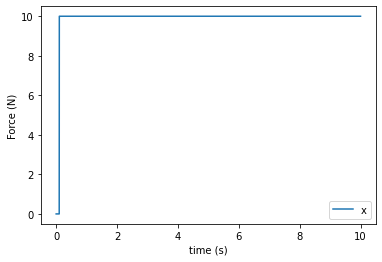

In [30]:
plt.figure(1)
plt.xlabel("time (s)")
plt.ylabel("Force (N)")
plt.plot(t,Fmeasarr,label = 'x')
plt.legend()

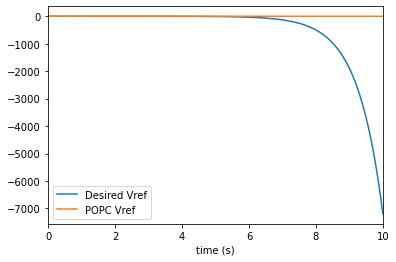

In [31]:

plt.figure(1)
plt.xlabel("time (s)")
plt.plot(t,vref2arr,label = 'Desired Vref')
plt.plot(t,vref1arr,label = 'POPC Vref')
plt.xlim(0,10)
plt.legend()

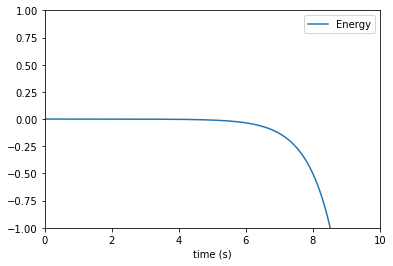

In [32]:

plt.figure(1)
plt.xlabel("time (s)")

plt.plot(t,Estor,label = 'Energy')
plt.xlim(0,10)
plt.ylim(-1,1)
plt.legend()

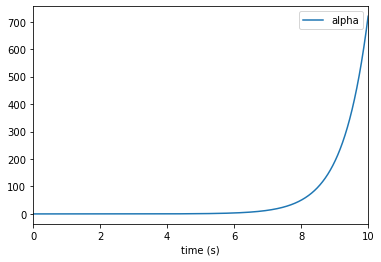

In [33]:

plt.figure(1)
plt.xlabel("time (s)")
plt.xlim(0,10)
plt.plot(t,alphaarr,label = 'alpha')

plt.legend()